# Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow import keras as tfk
import keras


In [2]:
data = tfk.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## Phase 1: Data preprocessing and visualization

At first reshape images as a line vector:

In [4]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).transpose(0, 3, 1, 2)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).transpose(0, 3, 1, 2)

In [5]:
min_val = np.min(x_train)
max_val = np.max(x_train)
print(min_val)
print(max_val)

0
255


Then normalize images:

In [6]:
x_train = x_train / 255
x_test = x_test / 255

Now we need to perform a one-hot encoding on the target labels:

In [7]:
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

First, we need to create a neural network with given parameters using Keras API and see the parameters.

Before that, we'll define two functions to see the classification report of trained model on train and test data and also plot accuracy and loss with respect to epochs:

In [8]:
def plot_model(log):
  plt.figure(figsize=(16, 10))
  plt.subplot(1, 2, 1)
  plt.plot(log.history['accuracy'])
  plt.plot(log.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.subplot(1, 2, 2)
  plt.plot(log.history['loss'])
  plt.plot(log.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [9]:
def report_percentage(model, x_train, y_train, x_test, y_test):
  y_pred = model.predict(x_train)
  y_pred = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_train, axis=1)
  print("Train:")
  print(classification_report(y_true, y_pred))

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_test, axis=1)
  print("Test:")
  print(classification_report(y_true, y_pred))

Set the default values, according to the description:

In [10]:
LEARNING_RATE = 0.01
EPOCHS = 10
BATCH_SIZE = 32

Then create a neural network with given parameters using Sequential model of Keras API:

In [11]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(512, activation='relu'),
    tfk.layers.Dense(512, activation='relu'),
    tfk.layers.Dense(512, activation='relu'),
    tfk.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________


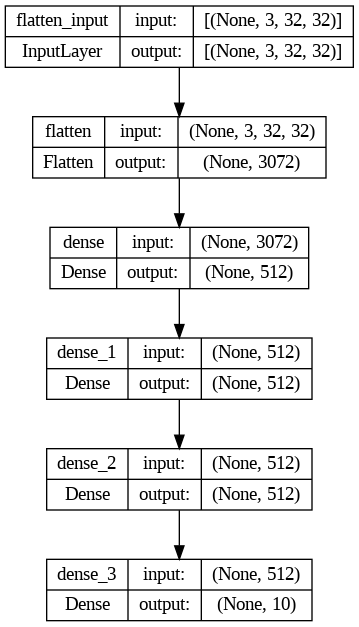

In [13]:
tfk.utils.plot_model(model, show_shapes=True)

We need to Choose SGD as an optimizier according to the description:

In [14]:
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Fit the model and see the result by ploting the model and calculating the F1 score:

In [15]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 7s 4ms/step - loss: 1.8927 - accuracy: 0.3209 - val_loss: 1.7558 - val_accuracy: 0.3730
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6956 - accuracy: 0.3983 - val_loss: 1.6554 - val_accuracy: 0.4164
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6124 - accuracy: 0.4298 - val_loss: 1.6087 - val_accuracy: 0.4373
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5498 - accuracy: 0.4485 - val_loss: 1.5545 - val_accuracy: 0.4473
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5022 - accuracy: 0.4646 - val_loss: 1.5469 - val_accuracy: 0.4531
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4628 - accuracy: 0.4816 - val_loss: 1.4996 - val_accuracy: 0.4662
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4243 - accuracy: 0.4944 - val_loss: 1.4772 - val_accuracy: 0.4767
Epo

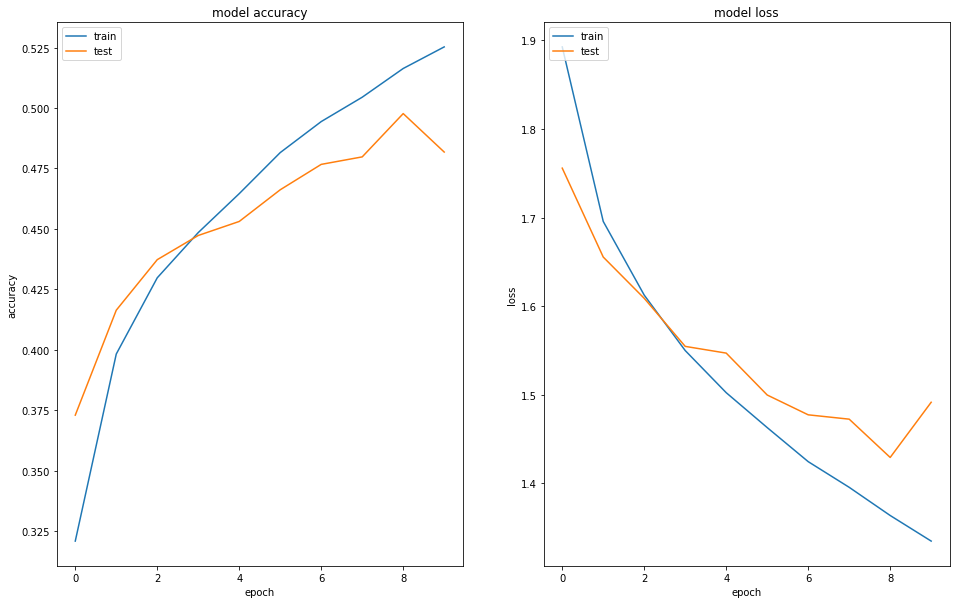

In [16]:
plot_model(log)

In [17]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      5000
           1       0.50      0.77      0.61      5000
           2       0.52      0.24      0.32      5000
           3       0.45      0.27      0.33      5000
           4       0.54      0.40      0.46      5000
           5       0.42      0.49      0.45      5000
           6       0.58      0.54      0.56      5000
           7       0.53      0.66      0.59      5000
           8       0.71      0.54      0.62      5000
           9       0.45      0.71      0.55      5000

    accuracy                           0.52     50000
   macro avg       0.53      0.52      0.51     50000
weighted avg       0.53      0.52      0.51     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
       

Now we need change the change model to achieve the best performance:

In [18]:
LEARNING_RATE = 0.01
EPOCHS = 10
BATCH_SIZE = 32

Create the model with 6 layers and 1024 neurons in each of them, also choose Leak ReLU as an activiation function:

In [19]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(10, activation='softmax')
])

In [20]:
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 5s 4ms/step - loss: 1.9178 - accuracy: 0.3074 - val_loss: 1.7716 - val_accuracy: 0.3724
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6996 - accuracy: 0.3917 - val_loss: 1.6579 - val_accuracy: 0.4062
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6045 - accuracy: 0.4261 - val_loss: 1.6334 - val_accuracy: 0.4194
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5387 - accuracy: 0.4521 - val_loss: 1.5427 - val_accuracy: 0.4540
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4803 - accuracy: 0.4714 - val_loss: 1.5279 - val_accuracy: 0.4557
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4368 - accuracy: 0.4869 - val_loss: 1.4741 - val_accuracy: 0.4803
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3985 - accuracy: 0.5016 - val_loss: 1.4554 - val_accuracy: 0.4861
Epo

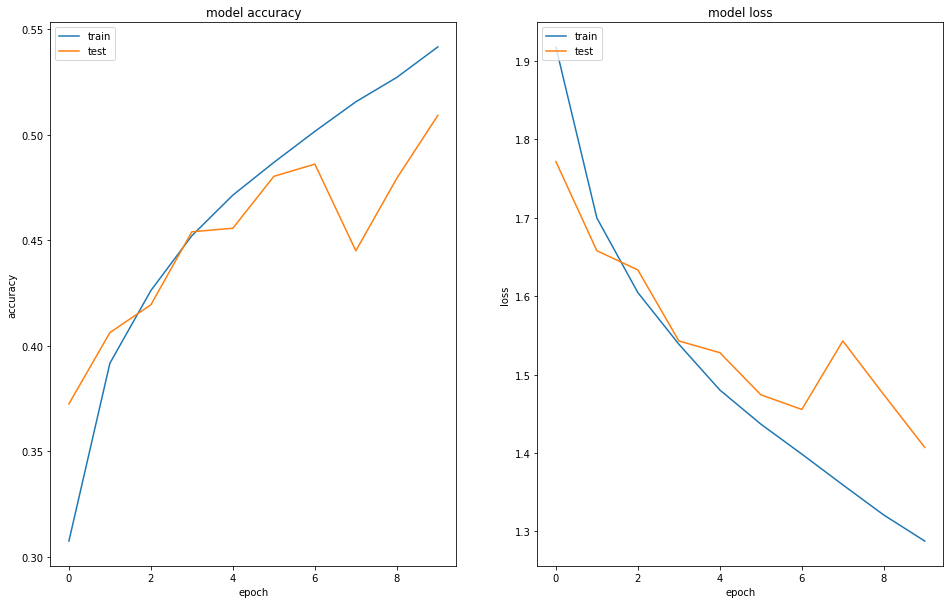

In [22]:
plot_model(log)

In [23]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.44      0.75      0.56      5000
           1       0.73      0.64      0.68      5000
           2       0.53      0.31      0.39      5000
           3       0.45      0.36      0.40      5000
           4       0.53      0.43      0.47      5000
           5       0.46      0.46      0.46      5000
           6       0.65      0.53      0.58      5000
           7       0.57      0.68      0.62      5000
           8       0.65      0.71      0.68      5000
           9       0.59      0.69      0.64      5000

    accuracy                           0.56     50000
   macro avg       0.56      0.56      0.55     50000
weighted avg       0.56      0.56      0.55     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.42      0.73      0.53      1000
       

# Phase 2: Impact of hyperparameters on performance

## Optimizer

- Momentum

    Momentum is an extension to the gradient descent optimization algorithm, often referred to as gradient descent with momentum.

  It is designed to accelerate the optimization process, e.g. decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm, e.g. result in a better final result.

  Momentum is an average of gradients that changes during the time and we use it to update weight in each step. Therefore, it leads to faster convergence.

  Momentum adding an additional hyperparameter. For each new weight update, we add the product of momentum value and the previous update. So the previous updates are considered on each. Because of this one batch can't change the direction of descent if most of the previous batches were moving toward a direction.

  Neural network momentum is a simple technique that often improves both training speed and accuracy as we will have bigger updates. It can also help us to skip the local minima because of the big update.

  A very large momentum can cause random behavior and prevent converging. Thus, it can stop the learning process. And a very small value won't help up much.

Momentum = 0.5

In [24]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 6s 4ms/step - loss: 1.8540 - accuracy: 0.3272 - val_loss: 1.7156 - val_accuracy: 0.3906
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6409 - accuracy: 0.4126 - val_loss: 1.6923 - val_accuracy: 0.4029
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5503 - accuracy: 0.4455 - val_loss: 1.5410 - val_accuracy: 0.4511
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4814 - accuracy: 0.4707 - val_loss: 1.5093 - val_accuracy: 0.4614
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4240 - accuracy: 0.4897 - val_loss: 1.5190 - val_accuracy: 0.4643
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3758 - accuracy: 0.5102 - val_loss: 1.4607 - val_accuracy: 0.4801
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3319 - accuracy: 0.5252 - val_loss: 1.4313 - val_accuracy: 0.4957
Epo

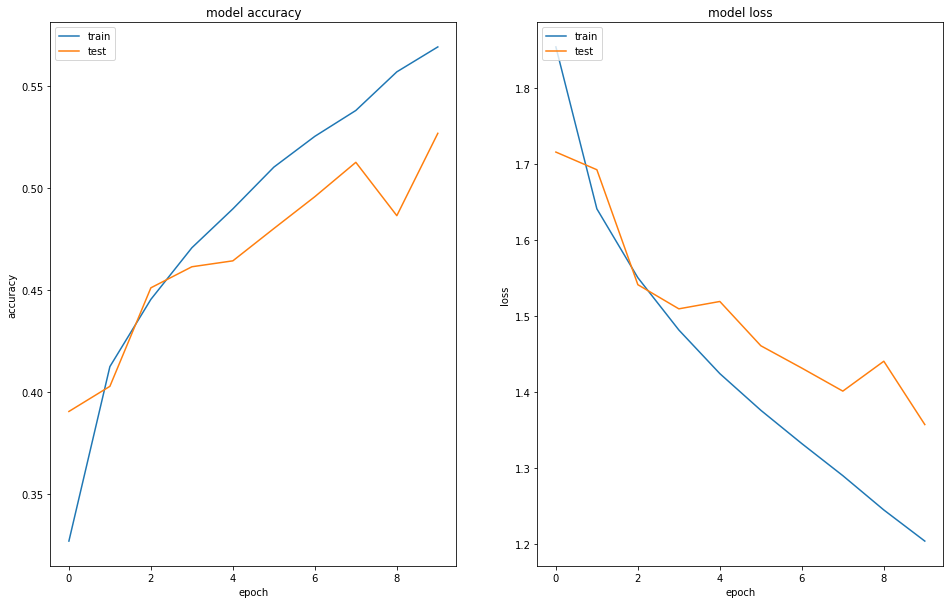

In [26]:
plot_model(log)

In [27]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      5000
           1       0.69      0.70      0.69      5000
           2       0.48      0.46      0.47      5000
           3       0.53      0.31      0.39      5000
           4       0.63      0.37      0.47      5000
           5       0.52      0.50      0.51      5000
           6       0.52      0.77      0.62      5000
           7       0.59      0.74      0.66      5000
           8       0.69      0.72      0.70      5000
           9       0.66      0.70      0.68      5000

    accuracy                           0.59     50000
   macro avg       0.59      0.59      0.58     50000
weighted avg       0.59      0.59      0.58     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1000
       

Momentum = 0.9

In [28]:
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 7s 5ms/step - loss: 1.5200 - accuracy: 0.4538 - val_loss: 1.5341 - val_accuracy: 0.4558
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4175 - accuracy: 0.4885 - val_loss: 1.4944 - val_accuracy: 0.4736
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3519 - accuracy: 0.5152 - val_loss: 1.4311 - val_accuracy: 0.4917
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2958 - accuracy: 0.5340 - val_loss: 1.4026 - val_accuracy: 0.5080
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2447 - accuracy: 0.5510 - val_loss: 1.4520 - val_accuracy: 0.4988
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2030 - accuracy: 0.5692 - val_loss: 1.4073 - val_accuracy: 0.5164
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1641 - accuracy: 0.5805 - val_loss: 1.4603 - val_accuracy: 0.4932
Epo

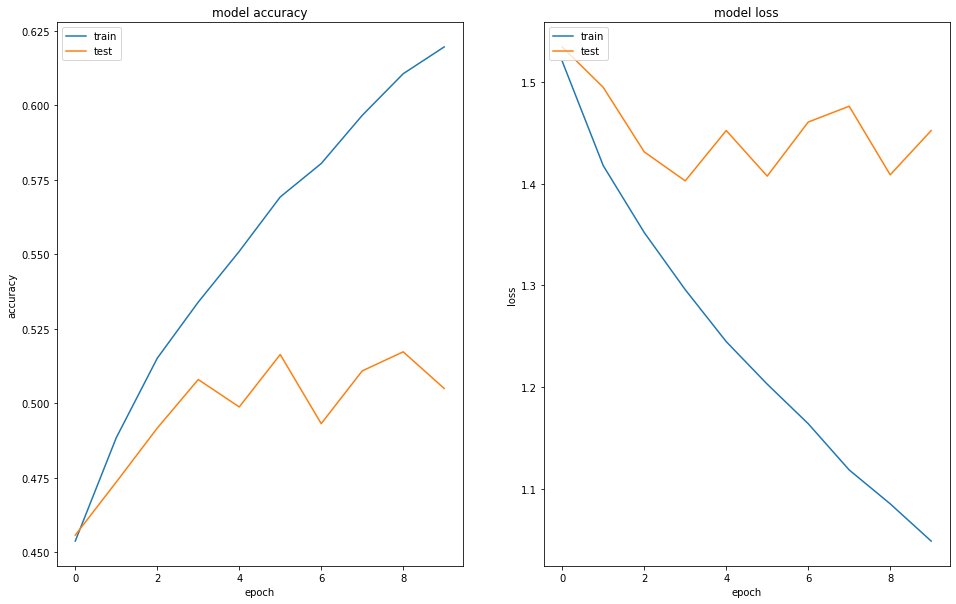

In [30]:
plot_model(log)

In [31]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.70      0.60      0.65      5000
           1       0.88      0.57      0.69      5000
           2       0.49      0.57      0.53      5000
           3       0.46      0.59      0.52      5000
           4       0.69      0.37      0.48      5000
           5       0.54      0.56      0.55      5000
           6       0.63      0.71      0.67      5000
           7       0.78      0.65      0.71      5000
           8       0.75      0.68      0.71      5000
           9       0.53      0.85      0.65      5000

    accuracy                           0.62     50000
   macro avg       0.64      0.62      0.62     50000
weighted avg       0.64      0.62      0.62     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.63      0.53      0.58      1000
       

Momentum = 0.98

In [32]:
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.98)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 7s 5ms/step - loss: 1.8437 - accuracy: 0.3544 - val_loss: 1.8825 - val_accuracy: 0.3451
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7805 - accuracy: 0.3643 - val_loss: 2.0309 - val_accuracy: 0.2792
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7688 - accuracy: 0.3737 - val_loss: 1.8650 - val_accuracy: 0.3803
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7384 - accuracy: 0.3850 - val_loss: 1.9373 - val_accuracy: 0.3574
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7870 - accuracy: 0.3710 - val_loss: 1.8764 - val_accuracy: 0.3285
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7646 - accuracy: 0.3791 - val_loss: 1.8671 - val_accuracy: 0.3910
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6932 - accuracy: 0.4015 - val_loss: 1.7116 - val_accuracy: 0.3836
Epo

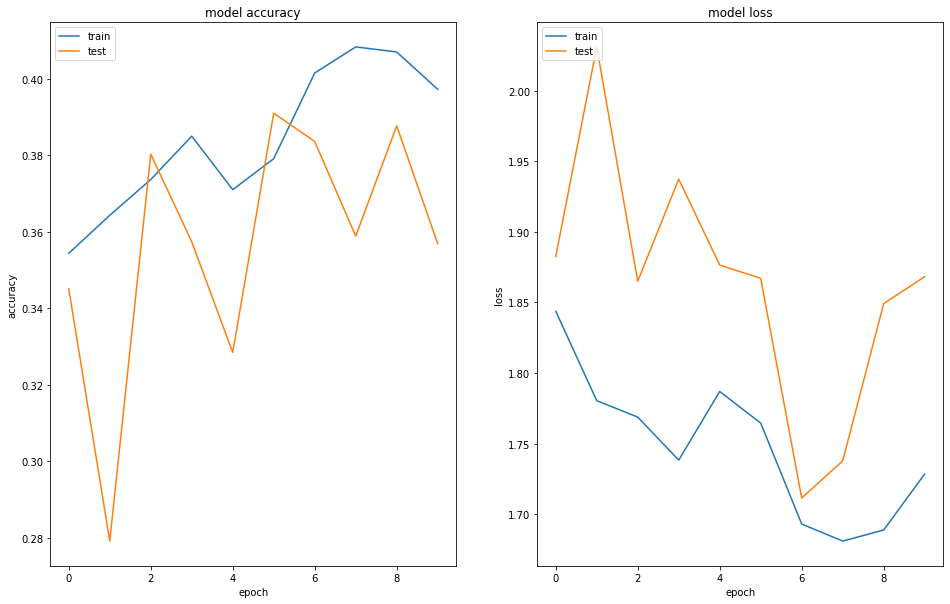

In [34]:
plot_model(log)

In [35]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.58      0.38      0.46      5000
           1       0.61      0.59      0.60      5000
           2       0.32      0.28      0.30      5000
           3       0.47      0.07      0.12      5000
           4       0.53      0.11      0.18      5000
           5       0.20      0.73      0.32      5000
           6       0.53      0.49      0.51      5000
           7       0.71      0.33      0.45      5000
           8       0.38      0.81      0.52      5000
           9       0.91      0.02      0.04      5000

    accuracy                           0.38     50000
   macro avg       0.52      0.38      0.35     50000
weighted avg       0.52      0.38      0.35     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1000
       

As you can see, using 0.9 for momentum helped the model converge to the minimum faster and better, but using greater value for momentum didn't helped it and resulted in poor performance, compared to previous momentum.

- Adam

    Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.The method is straightforward to implement, is computationally efficient, has little memory requirements, is invariant to diagonal rescaling of the gradients, and is well suited for problems that are large in terms of data and/or parameters. The method is also appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients.

In [36]:
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 32

In [37]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(10, activation='softmax')
])

In [38]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 5s 4ms/step - loss: 1.9905 - accuracy: 0.2837 - val_loss: 1.8484 - val_accuracy: 0.3212
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7782 - accuracy: 0.3591 - val_loss: 1.7770 - val_accuracy: 0.3564
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7007 - accuracy: 0.3903 - val_loss: 1.7161 - val_accuracy: 0.3871
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6410 - accuracy: 0.4129 - val_loss: 1.7370 - val_accuracy: 0.4021
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6100 - accuracy: 0.4259 - val_loss: 1.6025 - val_accuracy: 0.4388
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5683 - accuracy: 0.4383 - val_loss: 1.6737 - val_accuracy: 0.4059
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5436 - accuracy: 0.4475 - val_loss: 1.5512 - val_accuracy: 0.4609
Epo

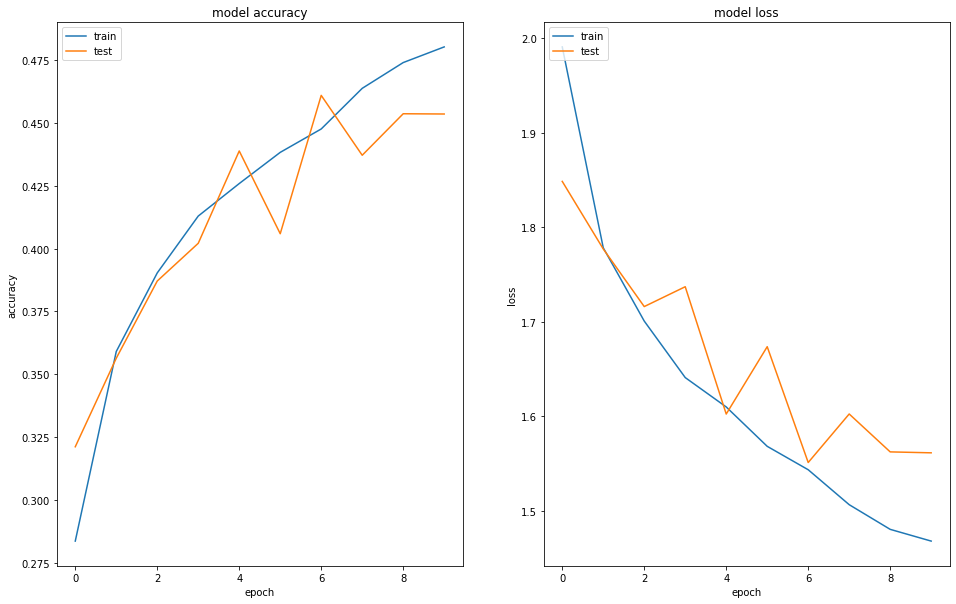

In [40]:
plot_model(log)

In [41]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.41      0.75      0.53      5000
           1       0.68      0.53      0.60      5000
           2       0.54      0.14      0.23      5000
           3       0.46      0.16      0.24      5000
           4       0.39      0.54      0.45      5000
           5       0.45      0.35      0.39      5000
           6       0.40      0.70      0.51      5000
           7       0.68      0.46      0.55      5000
           8       0.73      0.51      0.60      5000
           9       0.47      0.69      0.56      5000

    accuracy                           0.48     50000
   macro avg       0.52      0.48      0.46     50000
weighted avg       0.52      0.48      0.46     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.40      0.74      0.52      1000
       

We can see that adam optimizer has not worked rather well compare to those found by SGD. 

- Epoch

    An epoch in machine learning means one complete pass of the training dataset through the algorithm. This epoch’s number is an important hyperparameter for the algorithm. It specifies the number of epochs or complete passes of the entire training dataset passing through the training or learning process of the algorithm. 

    If we train the network for a few epochs, it leads to underfitting of the data. As we increase the number of epochs, it will reach an optimal situation where we will get maximum accuracy on the training set. If we keep increasing the number of epochs, it will lead to overfitting of the data because we train the data for many times and our model will start to model the noises in our data and it is a sign of overfitting and the accuracy of the test data will be reduced.

    if we don't have a lot of new data to train the model on, we use the same data in multiple epochs to learn its features. But if we have enough data we may get the optimal result in one iteration.


In [42]:
EPOCHS = 20

In [43]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 6s 4ms/step - loss: 1.4343 - accuracy: 0.4889 - val_loss: 1.4905 - val_accuracy: 0.4687
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4117 - accuracy: 0.4985 - val_loss: 1.5167 - val_accuracy: 0.4705
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4005 - accuracy: 0.5012 - val_loss: 1.4916 - val_accuracy: 0.4903
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3784 - accuracy: 0.5137 - val_loss: 1.4799 - val_accuracy: 0.4809
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3613 - accuracy: 0.5166 - val_loss: 1.5210 - val_accuracy: 0.4740
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3449 - accuracy: 0.5225 - val_loss: 1.5392 - val_accuracy: 0.4864
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3233 - accuracy: 0.5292 - val_loss: 1.5384 - val_accuracy: 0.4757
Epo

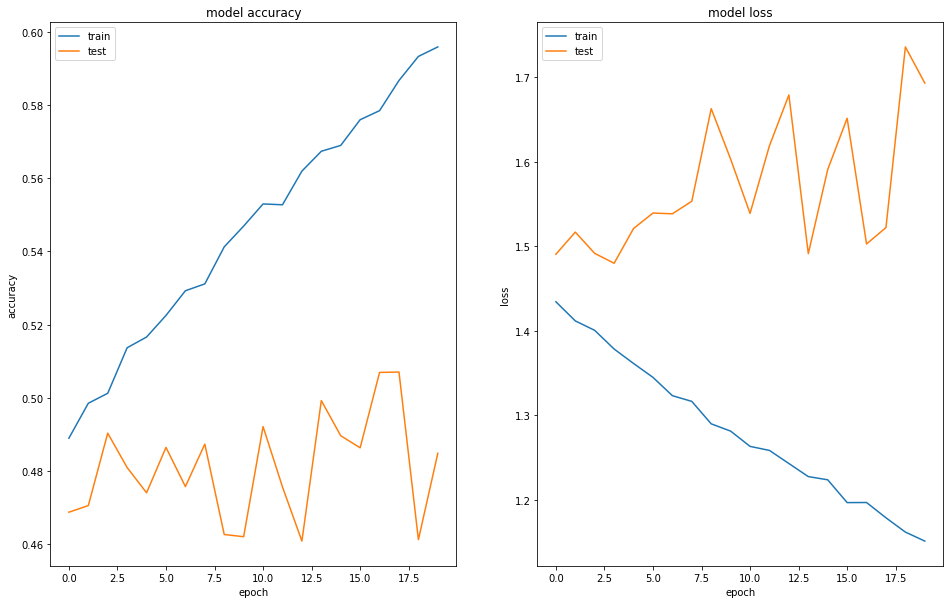

In [45]:
plot_model(log)

In [46]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.82      0.43      0.56      5000
           1       0.84      0.58      0.69      5000
           2       0.40      0.60      0.48      5000
           3       0.64      0.05      0.10      5000
           4       0.61      0.45      0.52      5000
           5       0.36      0.71      0.48      5000
           6       0.59      0.68      0.63      5000
           7       0.72      0.63      0.67      5000
           8       0.75      0.72      0.73      5000
           9       0.55      0.82      0.66      5000

    accuracy                           0.57     50000
   macro avg       0.63      0.57      0.55     50000
weighted avg       0.63      0.57      0.55     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.72      0.39      0.51      1000
       

- Loss function

    Cross-entropy is prefered for classification, while MSE is one of the best choices for regression.

    Reasons why Mean Squared Error(MSE) is a bad choice for binary classification problems:
    1. MSE function is non-convex for binary classification. Thus, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. Also, using MSE as a cost function assumes the Gaussian distribution which is not the case for binary classification.
    2. Using MSE means that we assume that the underlying data has been generated from a normal distribution. While in reality, a dataset that can be classified into two categories is not from a normal distribution but a Bernoulli distribution.

In [47]:
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 32

In [48]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(10, activation='softmax')
])

In [49]:
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])

In [50]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0904 - accuracy: 0.1000 - val_loss: 0.0900 - val_accuracy: 0.1119
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0898 - accuracy: 0.1150 - val_loss: 0.0896 - val_accuracy: 0.1214
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0894 - accuracy: 0.1291 - val_loss: 0.0892 - val_accuracy: 0.1283
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0890 - accuracy: 0.1414 - val_loss: 0.0889 - val_accuracy: 0.1462
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0887 - accuracy: 0.1592 - val_loss: 0.0886 - val_accuracy: 0.1654
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0884 - accuracy: 0.1741 - val_loss: 0.0883 - val_accuracy: 0.1797
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0881 - accuracy: 0.1911 - val_loss: 0.0880 - val_accuracy:

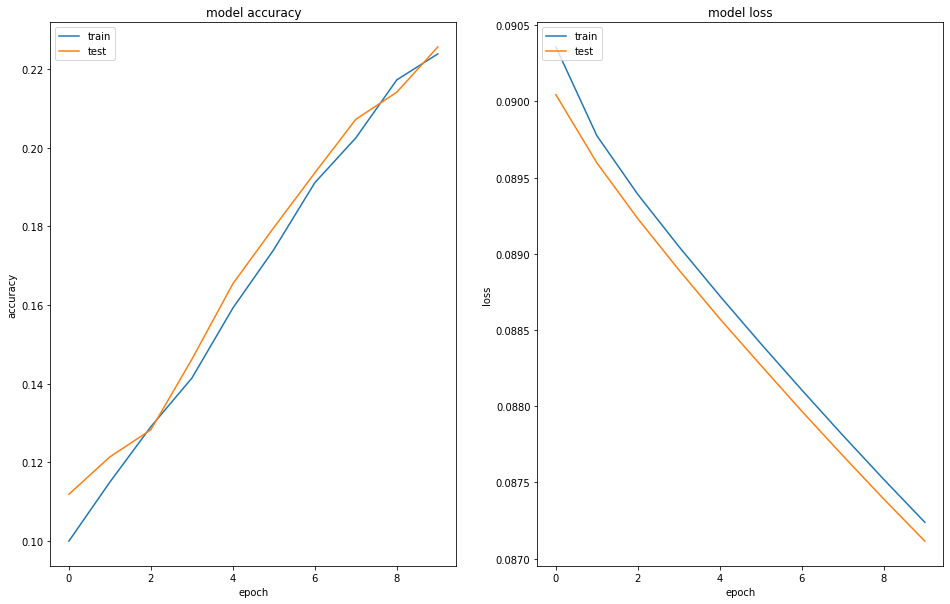

In [51]:
plot_model(log)

In [52]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.21      0.53      0.30      5000
           1       0.29      0.03      0.05      5000
           2       0.15      0.05      0.08      5000
           3       0.20      0.07      0.10      5000
           4       0.21      0.03      0.05      5000
           5       0.22      0.30      0.25      5000
           6       0.29      0.16      0.21      5000
           7       0.22      0.14      0.17      5000
           8       0.23      0.62      0.33      5000
           9       0.29      0.34      0.31      5000

    accuracy                           0.23     50000
   macro avg       0.23      0.23      0.19     50000
weighted avg       0.23      0.23      0.19     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.21      0.55      0.31      1000
       

As we can see results are worser than the categorical cross entropy.

- Dropout

    Dropout is a regularization method approximating concurrent training of many neural networks with various designs. During training, some layer outputs are ignored or dropped at random. This makes the layer appear and is regarded as having a different number of nodes and connectedness to the preceding layer. In practice, each layer update during training is carried out with a different perspective of the specified layer. Dropout makes the training process noisy, requiring nodes within a layer to take on more or less responsible for the inputs on a probabilistic basis.

In [53]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dropout(0.1),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dropout(0.1),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dropout(0.1),
    tfk.layers.Dense(10, activation='softmax')
])

In [54]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 6s 4ms/step - loss: 2.0416 - accuracy: 0.2649 - val_loss: 1.8535 - val_accuracy: 0.3109
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8489 - accuracy: 0.3358 - val_loss: 1.9667 - val_accuracy: 0.3108
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7909 - accuracy: 0.3568 - val_loss: 1.7334 - val_accuracy: 0.3755
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7473 - accuracy: 0.3790 - val_loss: 1.7013 - val_accuracy: 0.3932
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7167 - accuracy: 0.3902 - val_loss: 1.6822 - val_accuracy: 0.4037
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6937 - accuracy: 0.4004 - val_loss: 1.6655 - val_accuracy: 0.4016
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6713 - accuracy: 0.4095 - val_loss: 1.6611 - val_accuracy: 0.4134
Epo

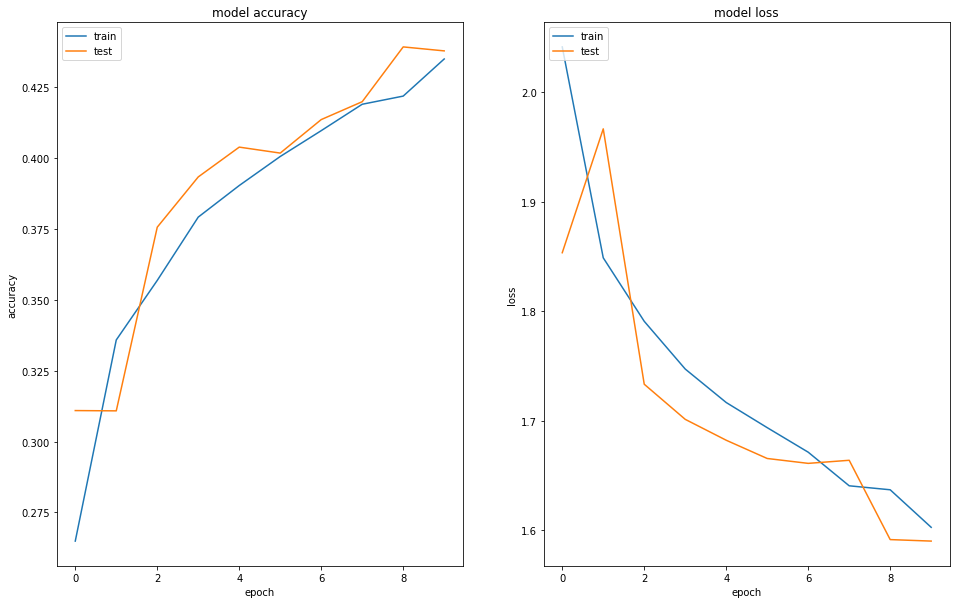

In [56]:
plot_model(log)

In [57]:
report_percentage(model, x_train, y_train, x_test, y_test)

1563/1563 [==============================] - 3s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.54      0.57      0.56      5000
           1       0.78      0.42      0.55      5000
           2       0.49      0.15      0.23      5000
           3       0.29      0.00      0.00      5000
           4       0.41      0.45      0.43      5000
           5       0.25      0.81      0.38      5000
           6       0.65      0.33      0.44      5000
           7       0.72      0.46      0.56      5000
           8       0.61      0.70      0.65      5000
           9       0.48      0.68      0.56      5000

    accuracy                           0.46     50000
   macro avg       0.52      0.46      0.44     50000
weighted avg       0.52      0.46      0.44     50000

313/313 [==============================] - 1s 2ms/step
Test:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
       

As you can see, the difference between the test and train data is reduced and it prevents overfitting.